In [1]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline
from scipy.stats import loguniform

In [5]:
# ASIGNACIÓN DE DATOS A VARIABLE
datos = pd.read_csv(filepath_or_buffer = "/Users/XITLALY/Evaluacion2/beisbol.csv", sep=',', low_memory=False)

In [6]:
# PRINT DE LOS DATOS
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [7]:
# SE MUESTRA CUANTOS DATOS Y COLUMNAS HAY
datos.shape

(30, 4)

In [8]:
# SE MUESTRAN MÉTRICAS DE LOS DATOS
datos.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


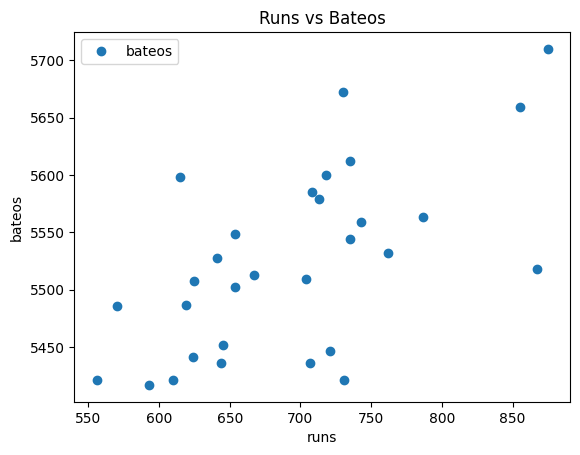

In [44]:
# SE GRAFICA CUANTOS BATEOS HAY POR CORRIDAS
datos.plot(x='runs', y='bateos', style='o') 
plt.title('Runs vs Bateos') 
plt.xlabel('runs') 
plt.ylabel('bateos') 
plt.show()

<Axes: xlabel='bateos', ylabel='Count'>

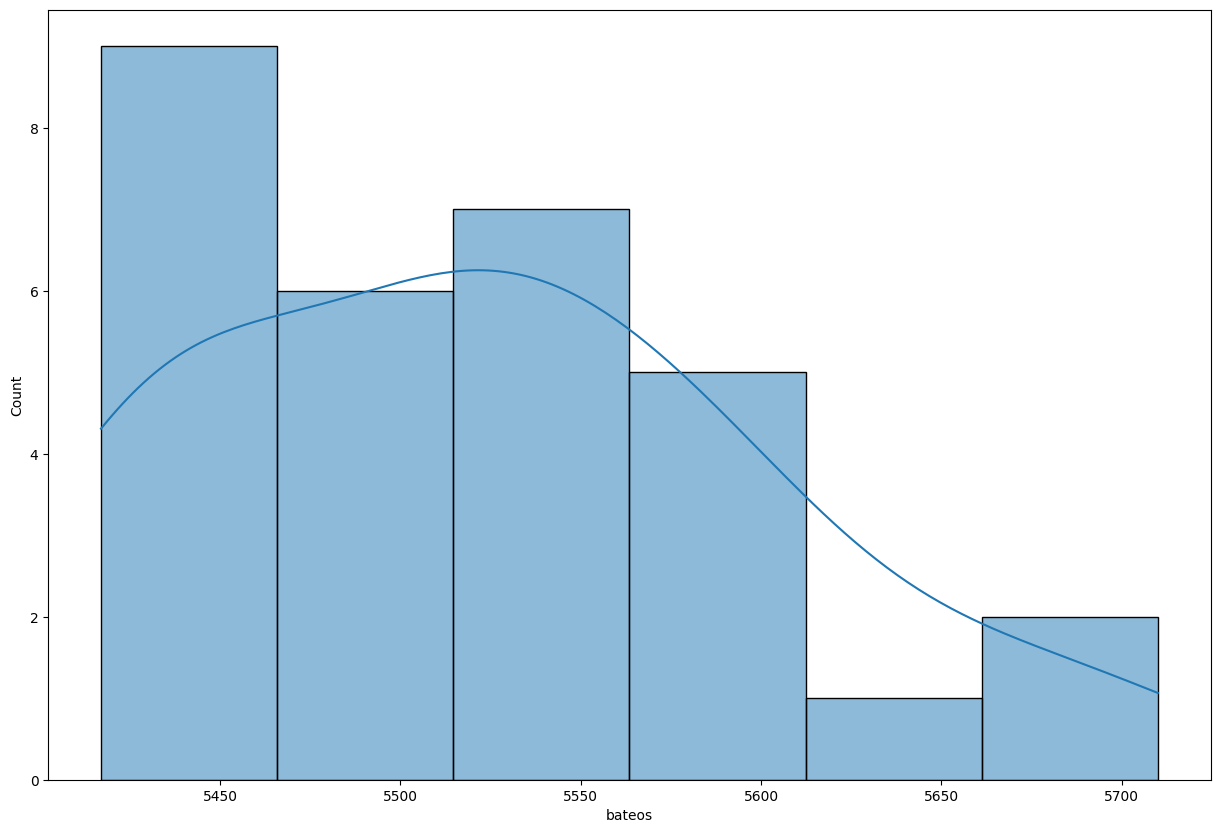

In [10]:
# GENERAR HISTROGRAMA DE LOS DATOS 'bateos'
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.histplot(datos['bateos'],kde=True)

In [11]:
# SE HACE LA SEPARACIÓN DE DATOS EN 'X' Y 'y'
X = datos['runs'].values.reshape(-1,1)
y = datos['bateos'].values.reshape(-1,1)

In [12]:
# PRINT A LOS DATOS DE X
X

array([[855],
       [875],
       [787],
       [730],
       [762],
       [718],
       [867],
       [721],
       [735],
       [615],
       [708],
       [644],
       [654],
       [735],
       [667],
       [713],
       [654],
       [704],
       [731],
       [743],
       [619],
       [625],
       [610],
       [645],
       [707],
       [641],
       [624],
       [570],
       [593],
       [556]])

In [13]:
# PRINT A LOS DATOS DE y
y

array([[5659],
       [5710],
       [5563],
       [5672],
       [5532],
       [5600],
       [5518],
       [5447],
       [5544],
       [5598],
       [5585],
       [5436],
       [5549],
       [5612],
       [5513],
       [5579],
       [5502],
       [5509],
       [5421],
       [5559],
       [5487],
       [5508],
       [5421],
       [5452],
       [5436],
       [5528],
       [5441],
       [5486],
       [5417],
       [5421]])

In [14]:
# SE DEFINEN DATOS DE PRUEBA Y DE ENTRENAMIENTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# ASIGNAMOS EL TIPO DE MODELO A UTILIZAR A NUESTRA VARIABLE
modelo = Ridge()

In [16]:
# ENTRENAMOS
modelo.fit(X_train, y_train)

Ridge()

In [17]:
# HACEMOS CALCULO DE LOS VALORES PREDICHOS
y_pred = modelo.predict(X_test)

In [18]:
# IMPRIMIMOS LA LONGITUD DE LOS VALORES DE PRUEBA Y LOS PREDICHOS
print(len(y_test), len(y_pred))

6 6


In [19]:
# CREAMOS UN NUEVO DATAFRAME Y LO ASIGNAMOS A NUESTRA VARIABLE CON LOS VALORES ACTUALES Y LOS PREDICHOS
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predichos': y_pred.flatten()})
# LOS MOSTRAMOS PARA VER RESULTADOS
datos2

,Actual,Predichos
0,5563,5577.663674
1,5417,5472.333295
2,5612,5549.430789
3,5585,5534.771406
4,5441,5489.164438
5,5436,5534.228466


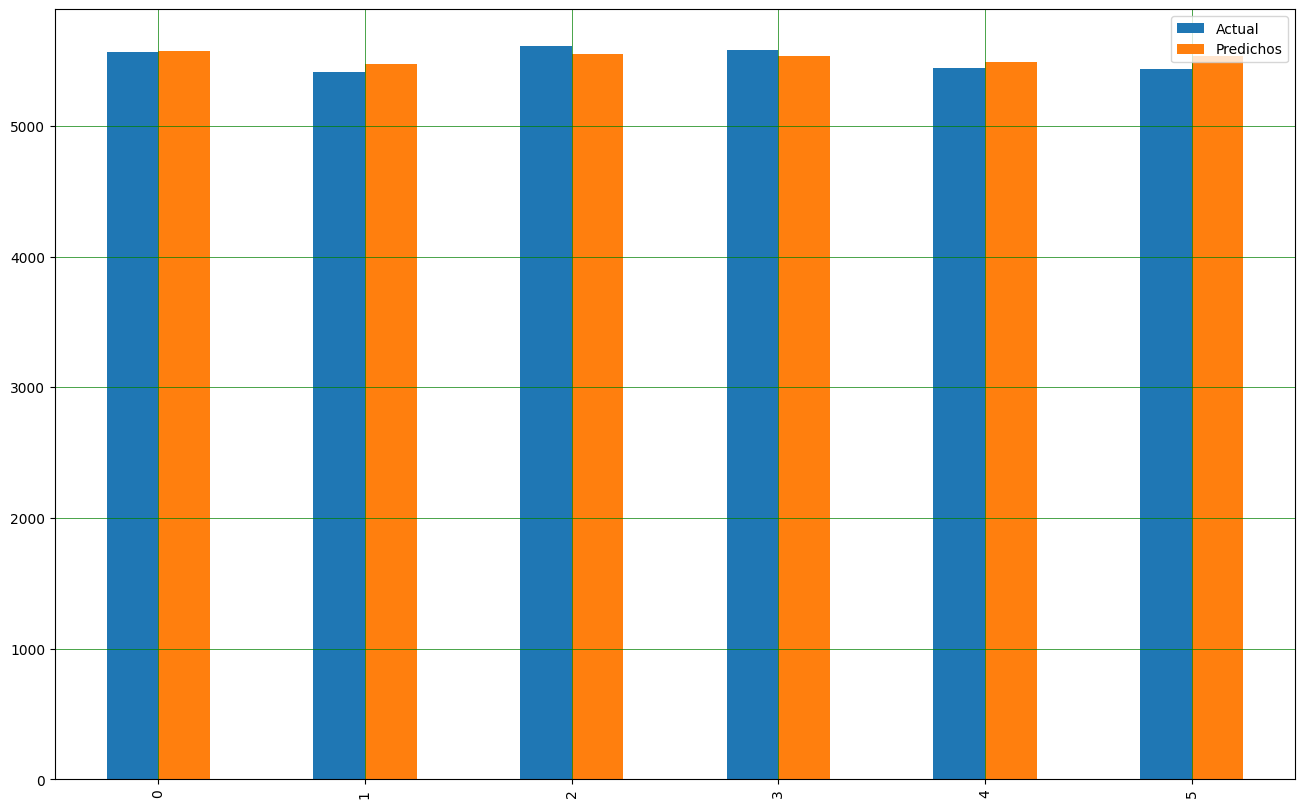

In [20]:
# CREAMOS Y MOSTRAMOS UNA GRÁFICA DE BARRAS PARA COMPARAR RESULTADOS
datos2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

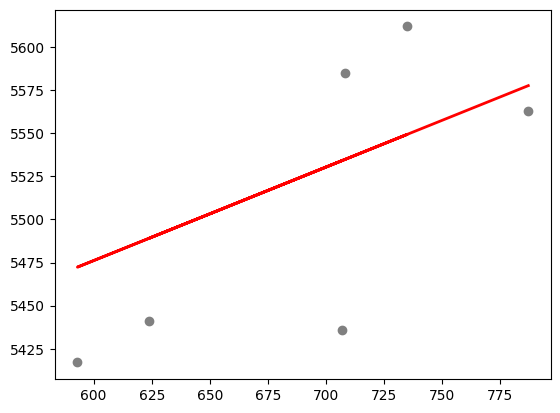

In [21]:
# CREAMOS GRÁFICO DE DISPERSIÓN CON LINEA DE REGRESIÓN
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
# OBTENEMOS NUESTRO ERROR ABSOLUTO MEDIO
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 

Error Absoluto Medio: 54.864613025963536


In [23]:
# OBTENEMOS NUESTRO ERROR CUADRATICO MEDIO
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred))

Error Cuadratico Medio: 3613.876556603925


In [24]:
# OBTENEMOS LA RAIZ DE NUESTRO ERROR CUADRATICO MEDIO
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Raíz del error cuadrático medio: 60.11552675144688


In [25]:
# OBTENEMOS NUESTRO COEFICIENTE DE DETERMINACIÓN R2
print('Coeficiente de Determinación R2 = ' + str(modelo.score(X_test,y_test)))

Coeficiente de Determinación R2 = 0.4251217100688385


In [26]:
# DEFINIMOS NUESTRAS ITERACIONES PARA LA EVALUACION
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [27]:
# OBTENEMOS EL INTERCEPTO
print(modelo.intercept_)
# OBTENEMOS LA PENDIENTE
print(modelo.coef_)

[5150.36981641]
[[0.5429401]]


In [28]:
# DEFINIMOS EL ESPACIO DE BÚSQUEDA
space = dict()
space['alpha'] = loguniform(1e-10, 100)
space['fit_intercept'] = [True, False]
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']

In [29]:
# DEFINIMOS LA BÚSQUEDA
search = RandomizedSearchCV(
    modelo,
    space,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=1
)
# EJECUTAMOS LA BÚSQUEDA
result = search.fit(X,y)

In [30]:
# MOSTRAMOS LOS RESULTADOS OBTENIDOS
print('Mejor puntuación: %s' % result.best_score_)
print('Mejores Hiperparametros: %s ' % result.best_params_)

Mejor puntuación: -54.45956277456892
Mejores Hiperparametros: {'alpha': np.float64(1.0723441152701025e-05), 'fit_intercept': True, 'solver': 'svd'} 


In [32]:
# SE OPTIMIZA EL MODELO CON LOS HIPERPARÁMETROS OBTENIDOS
modelo = Ridge(fit_intercept = True, solver = 'svd', alpha = 1.0723441152701025e-05)

In [33]:
# SE RE-ENTRENA EL MODELO
modelo.fit(X_train, y_train)

Ridge(alpha=1.0723441152701025e-05, solver='svd')

In [34]:
# RE-HACEMOS CALCULO DE LOS VALORES PREDICHOS
y_pred = modelo.predict(X_test)

In [35]:
# RE-CREAMOS UN NUEVO DATAFRAME Y LO RE-ASIGNAMOS A NUESTRA VARIABLE CON LOS VALORES ACTUALES Y LOS PREDICHOS
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predichos': y_pred.flatten()})
# LOS MOSTRAMOS PARA VER RESULTADOS
datos2

,Actual,Predichos
0,5563,5577.663969
1,5417,5472.332976
2,5612,5549.430919
3,5585,5534.771451
4,5441,5489.164217
5,5436,5534.228508


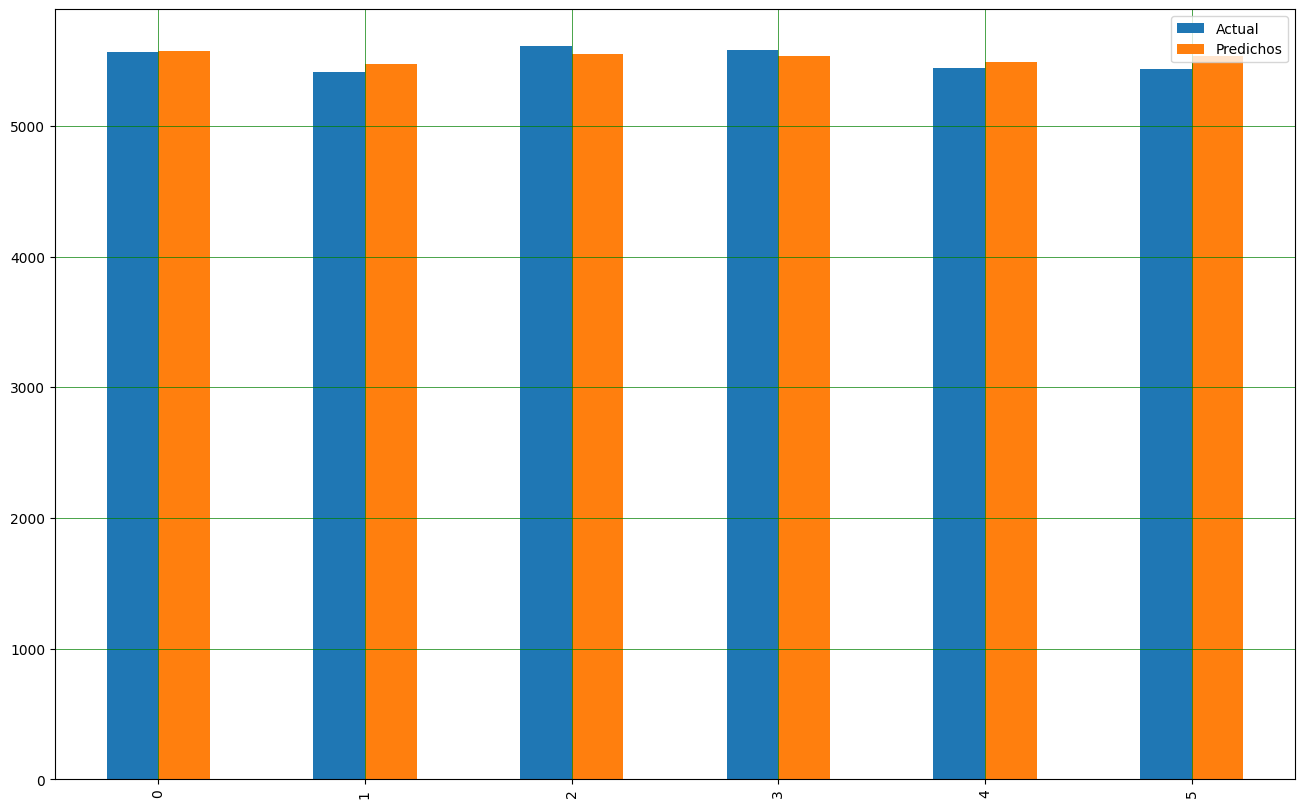

In [36]:
# RE-CREAMOS Y RE-MOSTRAMOS UNA GRÁFICA DE BARRAS PARA COMPARAR RESULTADOS
datos2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

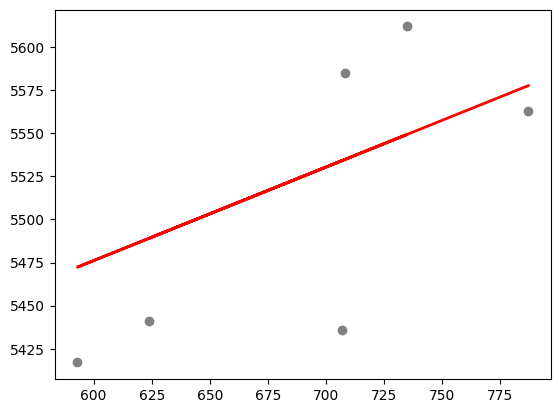

In [37]:
# RE-CREAMOS GRÁFICO DE DISPERSIÓN CON LINEA DE REGRESIÓN
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [38]:
# OBTENEMOS NUEVO ERROR ABSOLUTO MEDIO
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 

Error Absoluto Medio: 54.86454979420326


In [39]:
# OBTENEMOS NUESTRO NUEVO COEFICIENTE DE DETERMINACIÓN R2 CON LOS DATOS DE PRUEBA
print('Coeficiente de Determinación R2 = ' + str(modelo.score(X_test,y_test)))

Coeficiente de Determinación R2 = 0.42512331821711336


In [40]:
# OBTENEMOS NUESTRO COEFICIENTE DE DETERMINACIÓN R2 CON LOS DATOS REALES
print("Coeficiente de determinación R2: ", modelo.score(X,y))

Coeficiente de determinación R2:  0.3684350243093959


In [41]:
# ENTRENAMOS EL MODELO CON LOS DATOS DE ENTRENAMIENTO
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

Ridge(alpha=1.0723441152701025e-05, solver='svd')

In [42]:
# OBTENEMOS NUESTRO COEFICIENTE DE DETERMINACIÓN R2 CON LOS DATOS REALES Y EL NUEVO MODELO
print("Coeficiente de determinación R2: ", modelo.score(X,y))

Coeficiente de determinación R2:  0.3684350243093959


In [43]:
# OBTENEMOS NUESTRO COEFICIENTE DE DETERMINACIÓN R2 CON LOS DATOS DE PRUEBA Y EL NUEVO MODELO
print("Coeficiente de determinación R2 (PRUEBA): ", modelo.score(X_test,y_test))

Coeficiente de determinación R2 (PRUEBA):  0.42512331821711336
